# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : 0.29.24
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: None
bs4              : 4.10.0
bottleneck       : 1.3.2
fsspec

# Displaying first 5 rows and last 5 rows

In [3]:
data_x=pd.read_csv(r'archive-2.csv')
data_x.head(5)


,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_7_to_28cm (°C),soil_moisture_7_to_28cm (m³/m³)
0,1581868800,21.4,31.0,3.4,922.4,0.0,0.0,13.7,93.0,27.1,0.282
1,1581872400,20.3,37.0,5.2,922.6,0.0,0.0,14.1,94.0,26.9,0.282
2,1581876000,19.2,46.0,7.4,922.2,0.0,2.0,14.1,96.0,26.7,0.282
3,1581879600,18.4,56.0,9.5,921.9,0.0,3.0,13.0,93.0,26.5,0.282
4,1581883200,17.5,65.0,10.7,920.8,0.0,0.0,11.9,92.0,26.3,0.282


In [4]:
data_x.tail(5)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_7_to_28cm (°C),soil_moisture_7_to_28cm (m³/m³)
26251,1676372400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26252,1676376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26253,1676379600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26254,1676383200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26255,1676386800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_x.shape

(26256, 11)

There are 26256 datapoints with 11 parameter

In [6]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26256 entries, 0 to 26255
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             26256 non-null  int64  
 1   temperature_2m (°C)              26168 non-null  float64
 2   relativehumidity_2m (%)          26168 non-null  float64
 3   dewpoint_2m (°C)                 26168 non-null  float64
 4   surface_pressure (hPa)           26168 non-null  float64
 5   rain (mm)                        26168 non-null  float64
 6   cloudcover (%)                   26168 non-null  float64
 7   windspeed_10m (km/h)             26168 non-null  float64
 8   winddirection_10m (°)            26168 non-null  float64
 9   soil_temperature_7_to_28cm (°C)  26168 non-null  float64
 10  soil_moisture_7_to_28cm (m³/m³)  26168 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.2 MB


# Droping time parameter

We will drop the time paramter since it has no major significance

In [7]:
data_x.drop(labels=['time'],axis=1,inplace=True)
data_x.shape

(26256, 10)

In [8]:
data_x.columns

Index(['temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'rain (mm)', 'cloudcover (%)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)',
       'soil_temperature_7_to_28cm (°C)', 'soil_moisture_7_to_28cm (m³/m³)'],
      dtype='object')

Column was successfully droped

# Removing Outliers and Treating Missing 

We focus mainly on data_x here our main aim is to preserve atleast 70% of the  total data which is around 18000

In [9]:
data_x.isna()

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_7_to_28cm (°C),soil_moisture_7_to_28cm (m³/m³)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26251,True,True,True,True,True,True,True,True,True,True
26252,True,True,True,True,True,True,True,True,True,True
26253,True,True,True,True,True,True,True,True,True,True
26254,True,True,True,True,True,True,True,True,True,True


In [10]:
data_x.isnull().any()

temperature_2m (°C)                True
relativehumidity_2m (%)            True
dewpoint_2m (°C)                   True
surface_pressure (hPa)             True
rain (mm)                          True
cloudcover (%)                     True
windspeed_10m (km/h)               True
winddirection_10m (°)              True
soil_temperature_7_to_28cm (°C)    True
soil_moisture_7_to_28cm (m³/m³)    True
dtype: bool

In [11]:
data_x.isna().sum(axis=0)

temperature_2m (°C)                88
relativehumidity_2m (%)            88
dewpoint_2m (°C)                   88
surface_pressure (hPa)             88
rain (mm)                          88
cloudcover (%)                     88
windspeed_10m (km/h)               88
winddirection_10m (°)              88
soil_temperature_7_to_28cm (°C)    88
soil_moisture_7_to_28cm (m³/m³)    88
dtype: int64

In [12]:
data_x.shape[0]

26256

In [13]:
percentage_of_missing_value=(88/data_x.shape[0])*100
percentage_of_missing_value

0.3351614868982328

Since the percentage of data missing is less than 1 % we can drop the rows, Usual practice allows us to drop upto 30% of the data

# Droping the rows with missing values

In [14]:
data_x.dropna(axis=0,inplace=True)

In [15]:
data_x.shape

(26168, 10)

In [16]:
data_x.isna().sum(axis=0)

temperature_2m (°C)                0
relativehumidity_2m (%)            0
dewpoint_2m (°C)                   0
surface_pressure (hPa)             0
rain (mm)                          0
cloudcover (%)                     0
windspeed_10m (km/h)               0
winddirection_10m (°)              0
soil_temperature_7_to_28cm (°C)    0
soil_moisture_7_to_28cm (m³/m³)    0
dtype: int64

Checking for data skew

<AxesSubplot:>

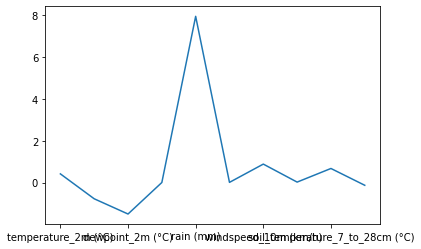

In [17]:
data_x.skew(axis=0,skipna=True).plot()

# Outlier Detection

<AxesSubplot:>

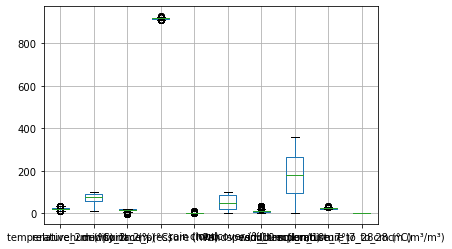

In [18]:
data_x.boxplot()

In [19]:
data_x.columns

Index(['temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'rain (mm)', 'cloudcover (%)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)',
       'soil_temperature_7_to_28cm (°C)', 'soil_moisture_7_to_28cm (m³/m³)'],
      dtype='object')

# Outlier detection using Z-score

Z-score indicates how many standard deviations away a data point is

we will drop the rows which lie beyound our threshold(z) that is z=-3 to +3)


In [20]:
from scipy import stats
import numpy as np

z=np.abs(stats.zscore(data_x))
print(z)

       temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  \
0                 0.311044                 1.902363          3.266225   
1                 0.585540                 1.625158          2.813909   
2                 0.860036                 1.209351          2.261077   
3                 1.059669                 0.747343          1.733374   
4                 1.284257                 0.331536          1.431829   
...                    ...                      ...               ...   
26163             1.034715                 0.793544          1.783631   
26164             1.234349                 0.608741          1.683117   
26165             1.433982                 0.377737          1.607730   
26166             1.633616                 0.192934          1.532344   
26167             1.808295                 0.008130          1.482087   

       surface_pressure (hPa)  rain (mm)  cloudcover (%)  \
0                    1.746606   0.267113        1.444812   
1  

In [21]:
z.shape

(26168, 10)

In [22]:
threshold=3
print(np.where(z>3))

(array([    0,    12,    13, ..., 25839, 25840, 25841], dtype=int64), array([2, 2, 2, ..., 2, 2, 2], dtype=int64))


In [23]:
z.iloc[0][2] # Greater than the threshold

3.2662253730071833

In [24]:
print(f"Shape of the data before removing the outlier: {data_x.shape}")


data_x=data_x[(z<3).all(axis=1)]

print(f"Shape of the data after removing the outlier: {data_x.shape}")

Shape of the data before removing the outlier: (26168, 10)
Shape of the data after removing the outlier: (24947, 10)


<AxesSubplot:>

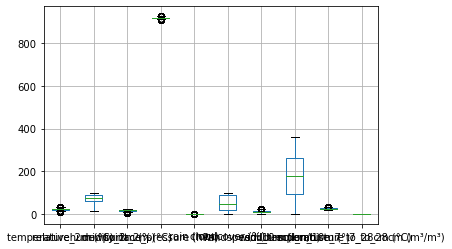

In [25]:
data_x.boxplot()

In [26]:
import seaborn as sns


C:\Users\Vasudevan p\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temperature_2m (°C)'>

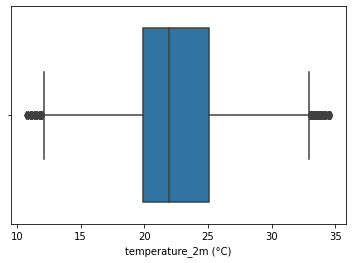

In [27]:
sns.boxplot(data_x['temperature_2m (°C)'])

# Let's use IQR(Interquartile range technique) to remove outliers

In [28]:
Q1=data_x.quantile(0.25)
Q3=data_x.quantile(0.75)

IQR=Q3-Q1

print(IQR)

temperature_2m (°C)                  5.200
relativehumidity_2m (%)             32.000
dewpoint_2m (°C)                     4.500
surface_pressure (hPa)               3.600
rain (mm)                            0.000
cloudcover (%)                      68.500
windspeed_10m (km/h)                 6.100
winddirection_10m (°)              169.000
soil_temperature_7_to_28cm (°C)      3.600
soil_moisture_7_to_28cm (m³/m³)      0.161
dtype: float64


In [29]:
def multi_outlier_treatment(data):
    
    columns=data.columns
    
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    IQR=Q3-Q1
    
    row_index_list=list()
    
    print()
    
    
    for col in columns:
        lower_range=Q1[col]-(1.5*IQR[col])
        upper_range=Q3[col]+(1.5*IQR[col])
        
        
        lower_data=data[data[col].values < lower_range]
        upper_data=data[data[col].values > upper_range]
        
        
        lower_outliers=lower_data.value_counts().sum(axis=0)
        uppper_outliers=upper_data.value_counts().sum(axis=0)
        
        total_outliers=lower_outliers+uppper_outliers
        
        print(f"Total Number of Outliers in: {col} is: {total_outliers}")
        
        
        lower_index=list(data[data[col] < lower_range].index)
        upper_index=list(data[data[col] > upper_range].index)
        
        total_index=list(lower_index+upper_index)
        
        row_index_list=list(row_index_list+total_index)
        
    row_index_list=list(set(row_index_list))
    row_index_list.sort()
    total_row_count=len(row_index_list)
    
    print()
    
    print(f"total number of unique rows to delete: {total_row_count}")
    
    print()
    
   
        
    print("Unique rows to delete:\n", row_index_list)
    
    print()
    
    return data.drop(row_index_list)

# Let's use IQR(Interquartile range technique) to remove outliers

In [30]:
print(f"Shape before droping the outlier rows: {data_x.shape}")

data=multi_outlier_treatment(data_x)

print(f"Shape after droping the outlier rows: {data.shape}")

Shape before droping the outlier rows: (24947, 10)

Total Number of Outliers in: temperature_2m (°C) is: 274
Total Number of Outliers in: relativehumidity_2m (%) is: 0
Total Number of Outliers in: dewpoint_2m (°C) is: 836
Total Number of Outliers in: surface_pressure (hPa) is: 25
Total Number of Outliers in: rain (mm) is: 4620
Total Number of Outliers in: cloudcover (%) is: 0
Total Number of Outliers in: windspeed_10m (km/h) is: 463
Total Number of Outliers in: winddirection_10m (°) is: 0
Total Number of Outliers in: soil_temperature_7_to_28cm (°C) is: 148
Total Number of Outliers in: soil_moisture_7_to_28cm (m³/m³) is: 0

total number of unique rows to delete: 6021

Unique rows to delete:
 [1, 2, 25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 65, 66, 67, 68, 69, 70, 85, 93, 94, 95, 110, 118, 132, 133, 158, 160, 186, 187, 396, 397, 398, 424, 425, 445, 446, 447, 453, 468, 469, 470, 471, 477, 516, 617, 618, 619, 620, 642, 643, 644, 733, 734, 735, 736, 737, 738, 739, 740, 741, 76

<AxesSubplot:xlabel='soil_temperature_7_to_28cm (°C)'>

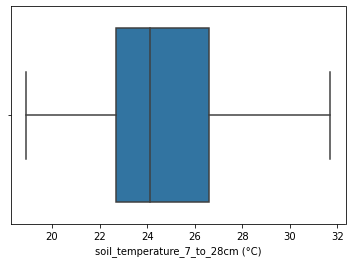

In [31]:
sns.boxplot(x=data['soil_temperature_7_to_28cm (°C)'])

<AxesSubplot:>

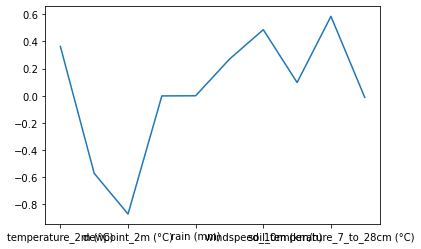

In [32]:
data.skew(axis=0,skipna=True).plot()

# Separating dependent and independent variables

In [33]:
data_x=data.drop(labels=['rain (mm)'],axis=1)
data_x




,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_7_to_28cm (°C),soil_moisture_7_to_28cm (m³/m³)
3,18.4,56.0,9.5,921.9,3.0,13.0,93.0,26.5,0.282
4,17.5,65.0,10.7,920.8,0.0,11.9,92.0,26.3,0.282
5,16.7,71.0,11.5,920.4,0.0,10.8,90.0,26.0,0.282
6,16.0,77.0,12.0,919.8,0.0,10.8,92.0,25.8,0.282
7,15.4,81.0,12.1,920.1,0.0,9.7,88.0,25.5,0.282
...,...,...,...,...,...,...,...,...,...
26163,18.5,55.0,9.3,921.2,8.0,10.0,105.0,25.0,0.289
26164,17.7,59.0,9.7,920.0,10.0,8.5,102.0,24.8,0.289
26165,16.9,64.0,10.0,919.2,14.0,7.6,95.0,24.6,0.289
26166,16.1,68.0,10.3,918.7,14.0,8.0,95.0,24.3,0.289


In [34]:
data_y=data['rain (mm)']

In [35]:
data_y.shape

(18926,)

# Pearson Correlation

The Pearson coefficient is a measure of the intensity and direction of a linear relationship between two variables that allows no
assumptions about causality. It represents correlation rather than causation and has a scale of +1 to -1, with +1 representing a positive
correlation, -1 representing a negative correlation, and 0 representing no relationship.

In [36]:
pearsoncorr=data_x.corr(method='pearson')
pearsoncorr

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),soil_temperature_7_to_28cm (°C),soil_moisture_7_to_28cm (m³/m³)
temperature_2m (°C),1.000000,-0.778714,-0.031417,-0.078277,-0.088903,-0.020694,0.150667,0.557200,-0.221794
relativehumidity_2m (%),-0.778714,1.000000,0.627715,-0.218395,0.435719,0.053372,0.089348,-0.393945,0.463920
dewpoint_2m (°C),-0.031417,0.627715,1.000000,-0.429833,0.562783,0.101676,0.339573,0.039065,0.478443
surface_pressure (hPa),-0.078277,-0.218395,-0.429833,1.000000,-0.338248,-0.143737,-0.347290,-0.168637,-0.297188
cloudcover (%),-0.088903,0.435719,0.562783,-0.338248,1.000000,0.345392,0.183118,-0.286888,0.507170
windspeed_10m (km/h),-0.020694,0.053372,0.101676,-0.143737,0.345392,1.000000,0.110268,-0.190628,0.207638
winddirection_10m (°),0.150667,0.089348,0.339573,-0.347290,0.183118,0.110268,1.000000,0.265715,0.003024
soil_temperature_7_to_28cm (°C),0.557200,-0.393945,0.039065,-0.168637,-0.286888,-0.190628,0.265715,1.000000,-0.609462
soil_moisture_7_to_28cm (m³/m³),-0.221794,0.463920,0.478443,-0.297188,0.507170,0.207638,0.003024,-0.609462,1.000000


<AxesSubplot:>

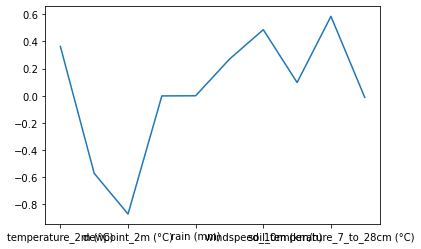

In [37]:
data.skew(axis=0,skipna=True).plot()

Value lies between -1 to +1
 
Value closer to 1 are positively correlated.

Values close to -1 are negatively correlated

Heatmap are used to enchase visualiztion


<AxesSubplot:>

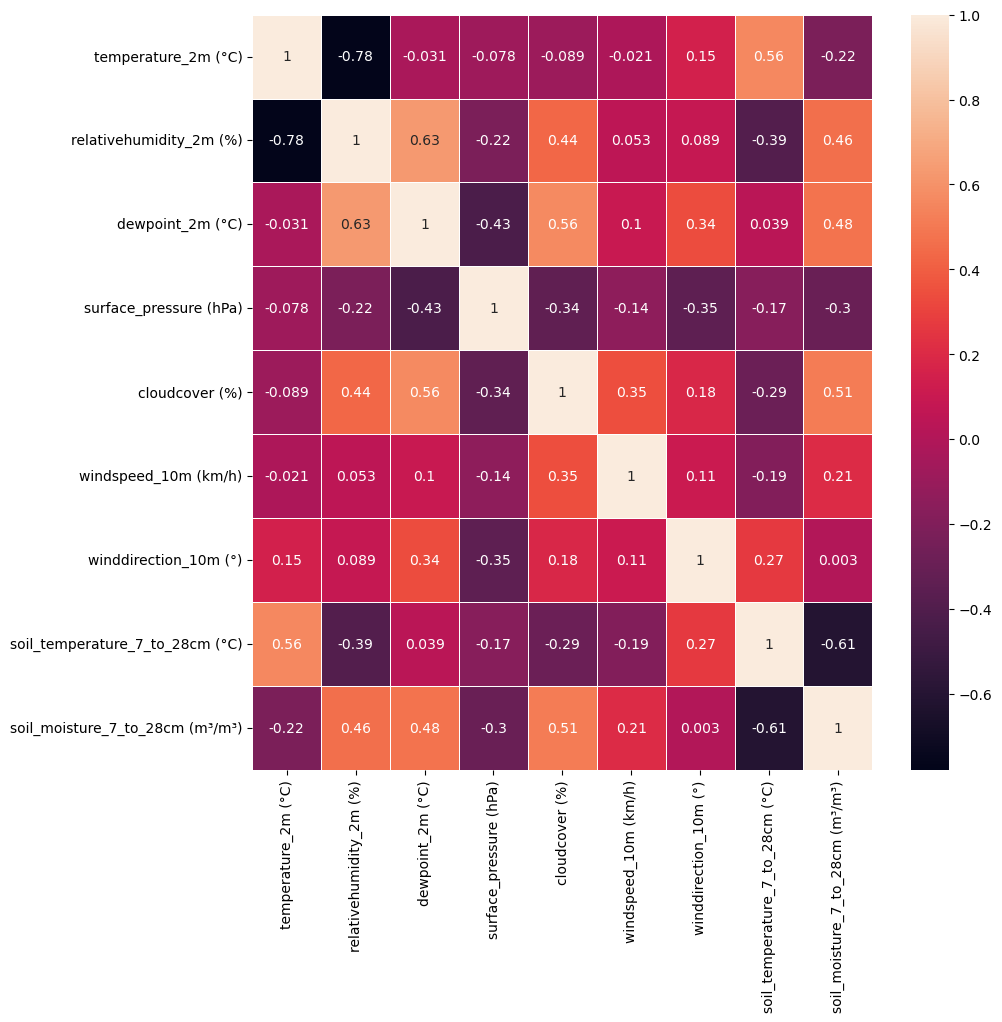

In [38]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,annot=True,linewidths=0.5)

In [39]:
print(data_x[['winddirection_10m (°)','windspeed_10m (km/h)']].corr())

                       winddirection_10m (°)  windspeed_10m (km/h)
winddirection_10m (°)               1.000000              0.110268
windspeed_10m (km/h)                0.110268              1.000000


In [40]:
print(data_x[['temperature_2m (°C)','soil_temperature_7_to_28cm (°C)']].corr())

                                 temperature_2m (°C)  \
temperature_2m (°C)                           1.0000   
soil_temperature_7_to_28cm (°C)               0.5572   

                                 soil_temperature_7_to_28cm (°C)  
temperature_2m (°C)                                       0.5572  
soil_temperature_7_to_28cm (°C)                           1.0000  


In [41]:
print(data_x[['relativehumidity_2m (%)','cloudcover (%)']].corr())

                         relativehumidity_2m (%)  cloudcover (%)
relativehumidity_2m (%)                 1.000000        0.435719
cloudcover (%)                          0.435719        1.000000


In [42]:
data_x.columns

Index(['temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'cloudcover (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)', 'soil_temperature_7_to_28cm (°C)',
       'soil_moisture_7_to_28cm (m³/m³)'],
      dtype='object')

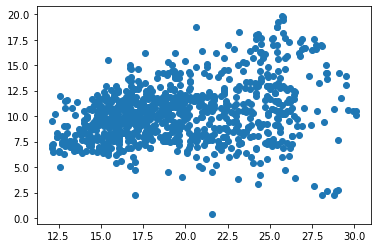

In [43]:
plt.scatter(data['temperature_2m (°C)'][18000:],data['windspeed_10m (km/h)'][18000:])

A sample of temperature and windspeed are seemed to be clustered together which means datapoints are closer to mean which high variance

C:\Users\Vasudevan p\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


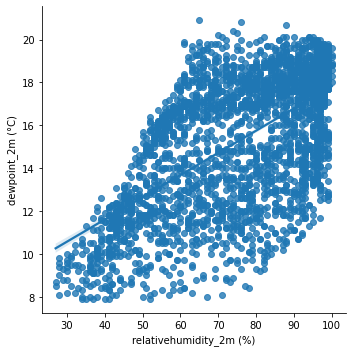

In [44]:
sns.lmplot('relativehumidity_2m (%)','dewpoint_2m (°C)',data=data_x[16000:],fit_reg=True)

ploting a line to determine how close the data are the slope line"

C:\Users\Vasudevan p\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


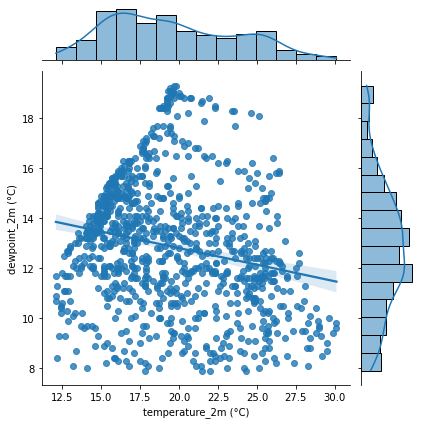

In [45]:
sns.jointplot('temperature_2m (°C)',  'dewpoint_2m (°C)',data=data_x[18000:],kind='reg')

Data seems to be skewed but we won't furture treat it because we need to preserve datapoints and its feature. Removing the data drastically effected the mean  which is a balancing point in any dataset

Its necessary to remove correlated variables to improve our model. We must find correlations can visualize the correlation matrix using a
heatmap.


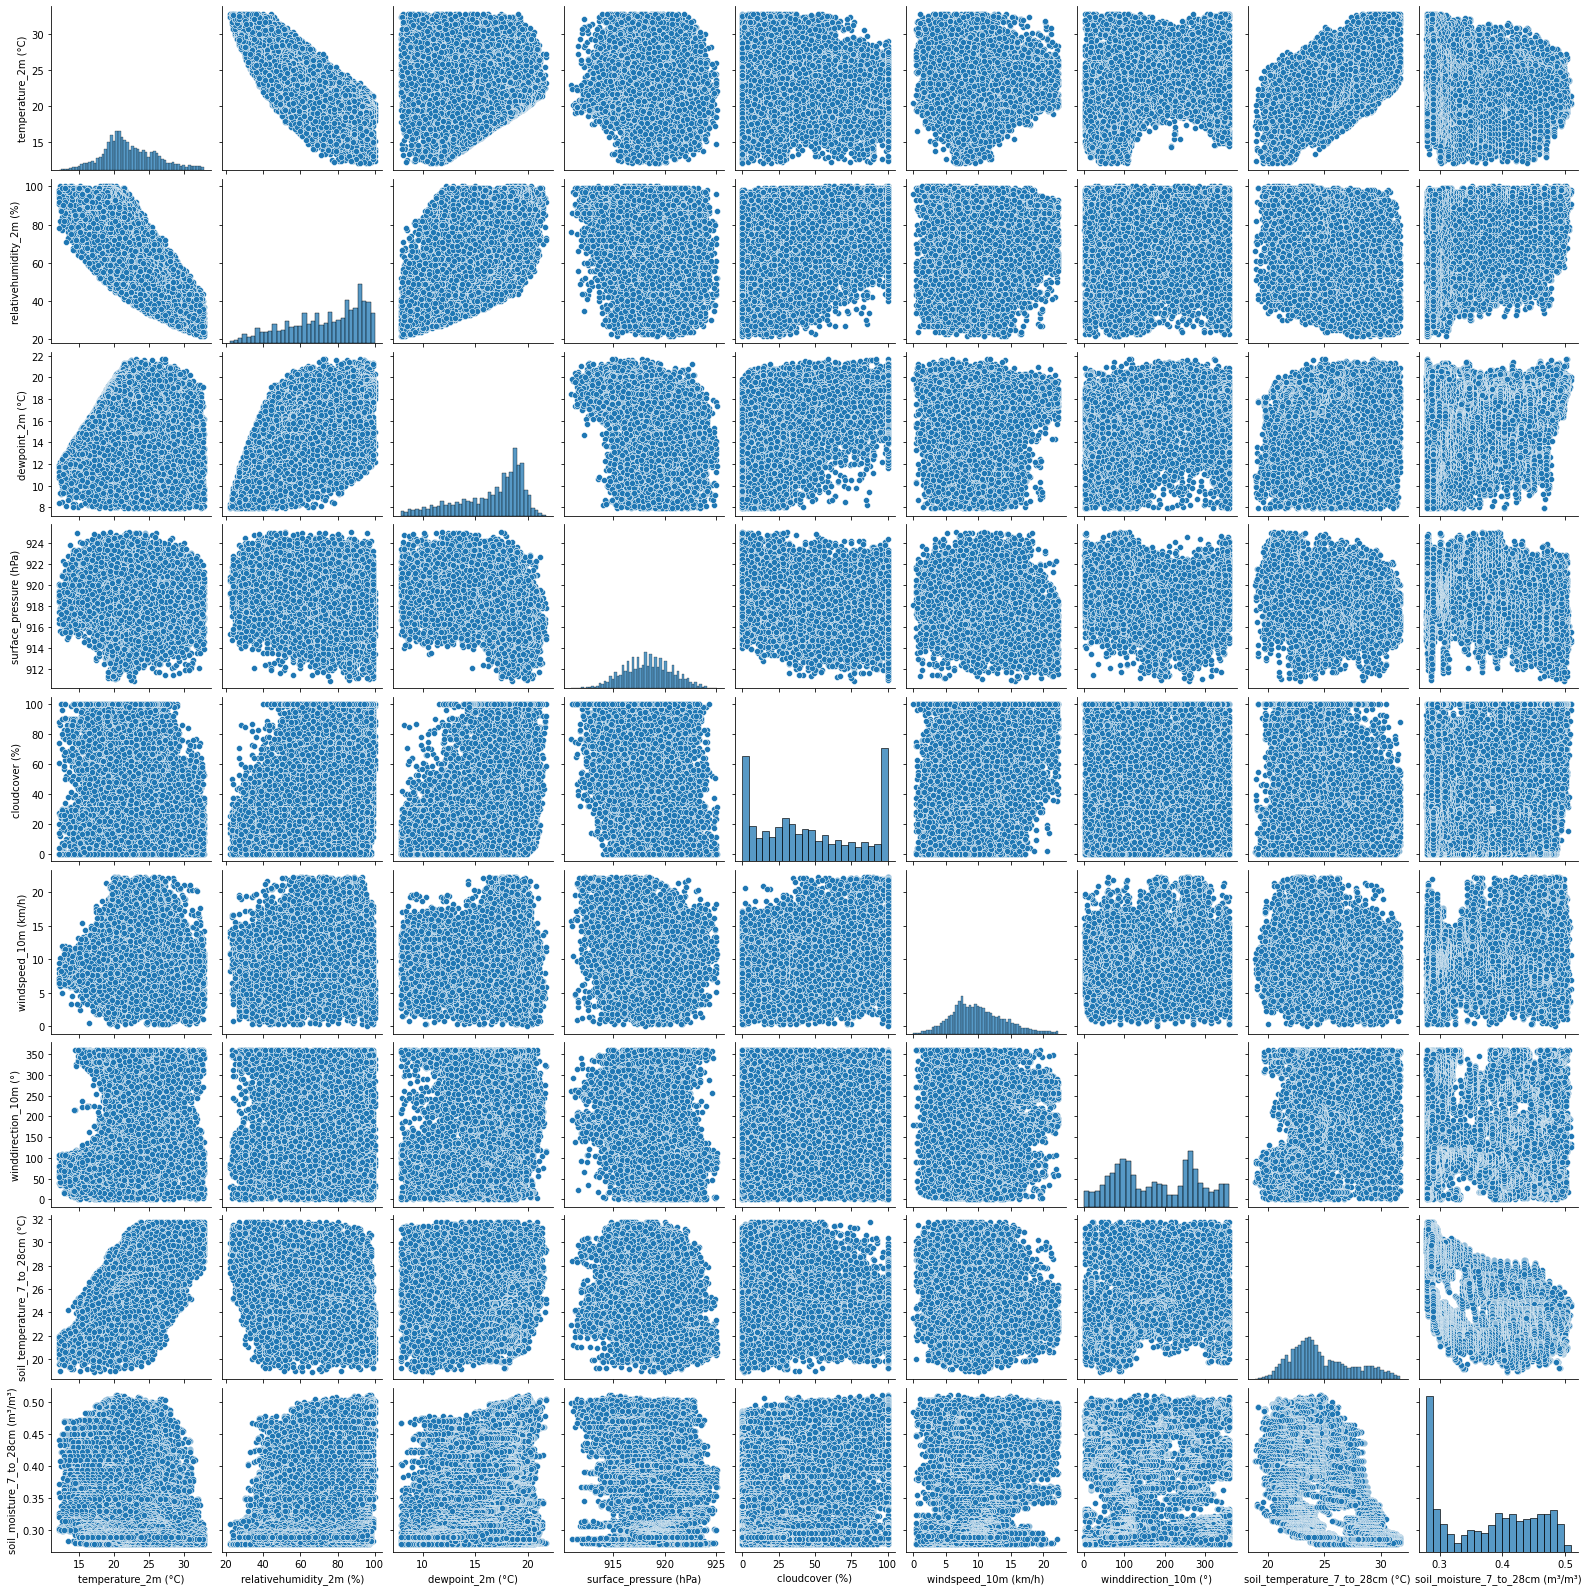

In [46]:
#Visualizing relations between all major variables
cols=data_x.columns
sns.pairplot(data_x[cols])

# Model Selection

Importing tensorflow

In [47]:
import tensorflow as tf
from sklearn.model_selection import  train_test_split


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

# Initializing the ANN

# Regularizer Layer

# Adding the input layer and the first hidden layer

# Adding the output layer

# compiling the ANN

# Training the ANN on the Training set

In [58]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))
ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
ann.fit(x_train, y_train,
              batch_size=128,
              epochs=25)
ann.evaluate(x_test, y_test, verbose=0)

Epoch 1/25
119/119 [==============================] - 1s 2ms/step - loss: 82.2126 - accuracy: 0.5332
Epoch 2/25
119/119 [==============================] - 0s 2ms/step - loss: 3.0620 - accuracy: 0.6118
Epoch 3/25
119/119 [==============================] - 0s 2ms/step - loss: 2.3502 - accuracy: 0.6287
Epoch 4/25
119/119 [==============================] - 0s 2ms/step - loss: 1.8856 - accuracy: 0.6362
Epoch 5/25
119/119 [==============================] - 0s 2ms/step - loss: 1.5922 - accuracy: 0.6460
Epoch 6/25
119/119 [==============================] - 0s 2ms/step - loss: 1.3663 - accuracy: 0.6588
Epoch 7/25
119/119 [==============================] - 0s 2ms/step - loss: 1.1788 - accuracy: 0.6728
Epoch 8/25
119/119 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.6859
Epoch 9/25
119/119 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.6999
Epoch 10/25
119/119 [==============================] - 0s 2ms/step - loss: 0.7521 - accuracy: 0.710

[0.05110453441739082, 0.973586916923523]

# Making  prediction and Evaluating

In [59]:
y_pred = ann.predict(x_test)
ann.evaluate(x_test, y_test, verbose=0)

[0.05110453441739082, 0.973586916923523]

# Saving the model

In [60]:
ann_tojson=ann.to_json()
with open("ann.json","w") as json:
    json.write(ann_tojson)
ann.save_weights("model.h5")

In [61]:
from tensorflow.keras.models import model_from_json

In [62]:
json_file = open('ann.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [63]:
loaded_model.predict([[21.4,31,3.4,922.4,0,13.7,93,27.1,0.282]])

array([[0.02031276]], dtype=float32)